Import modules

In [0]:
import tensorflow as tf
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')
!cp "/content/drive/My Drive/Colab Notebooks/clogit_df.csv" "clogit_df.csv"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


데이터 불러오기, 결측치 제거, 변수 선택

In [4]:
# 데이터 불러오기

data = pd.read_csv("clogit_df.csv",encoding='utf-8')
print("전체 데이터 개수 : ",len(data))


# 2016년 이후 데이터
data = data[0:27939]


# 결측치 제거 (X,y 변수 모두!)
data = data.dropna(subset=['distance','record',
                           'date','code','lane','age','jockey_w','dandivi','yeondivi',
                           'cure_in_1m','weight_diff', 'raw_weight','weight_added','jockey',
                           'prev1_velo','prev2_velo','sex1','sex2'])

print("결측치 제거 후 개수 : ",len(data))


# distance별로 데이터 나누기

gb_distance = data.groupby(['distance'])
gb_distance=[gb_distance.get_group(x) for x in gb_distance.groups]

# distance list
distance_list = list(set(data['distance']))
distance_list.sort()

for i in range(len(gb_distance)):
  print(distance_list[i] ,"m 거리에서 데이터 개수 : ",len(gb_distance[i]))


전체 데이터 개수 :  56576
결측치 제거 후 개수 :  27922
1000.0 m 거리에서 데이터 개수 :  4228
1200.0 m 거리에서 데이터 개수 :  6410
1300.0 m 거리에서 데이터 개수 :  7621
1400.0 m 거리에서 데이터 개수 :  3379
1700.0 m 거리에서 데이터 개수 :  3890
1800.0 m 거리에서 데이터 개수 :  1685
1900.0 m 거리에서 데이터 개수 :  295
2000.0 m 거리에서 데이터 개수 :  377
2300.0 m 거리에서 데이터 개수 :  37


In [0]:
# 데이터 가장 많은 Dataframe 선택  
data=gb_distance[2]


# X,y 데이터 나누기 (변수 결정하기)
y = data['record']
X = data.loc[:, ['date','code','lane','age','jockey_w','dandivi','yeondivi',
                 'cure_in_1m','weight_diff', 'raw_weight','weight_added','jockey',
                 'prev1_velo','prev2_velo','sex1','sex2']]


# X에 year,month 추가
year=[]
month=[]

# print(X.shape)
for i in range(X.shape[0]):
  word =list(X['date'])[i].split("-")
  year.append(int(word[0])-2010)
  month.append(int(word[1]))
  
X['year'] = year
X['month'] = month
#print(X['year'],X['month'])
X=X.drop(['date'],axis=1)


# 
X = X.as_matrix()
y = y.as_matrix()


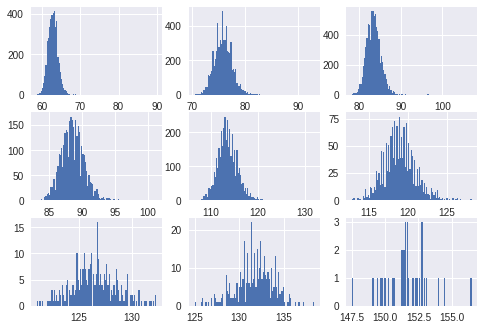

In [14]:
import matplotlib.pyplot as plt
for i in range(len(distance_list)):
  data=gb_distance[i]
  
  plt.subplot(3,3,i+1)
  plt.hist(data['record'],bins=100)

In [0]:
# 설정하는 부분

learning_rate = 0.01
training_epochs = 400
batch_size = 128


In [0]:
# Train , Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

train_size = len(X_train)
print("train_size : ",train_size)

size_x = len(X_train[0])
print("size_x : ",size_x)


train_size :  5334
size_x :  17


In [0]:
# Normalize 

X_mean = []
X_std = []

for i in range(size_x):
  X_mean.append(np.mean(X_train[:,i]))
  X_std.append(np.std(X_train[:,i]))
  print(i+1,"번째 변수의 X_mean:",'{:.3f}'.format(X_mean[i]),", X_std:",'{:.3f}'.format(X_std[i]))
  X_train[:,i] = (X_train[:,i]-X_mean[i])/X_std[i]
  X_test[:,i] = (X_test[:,i]-X_mean[i])/X_std[i]

  



1 번째 변수의 X_mean: 34655.511 , X_std: 2175.502
2 번째 변수의 X_mean: 6.037 , X_std: 3.298
3 번째 변수의 X_mean: 3.559 , X_std: 0.832
4 번째 변수의 X_mean: 53.813 , X_std: 1.697
5 번째 변수의 X_mean: 32.363 , X_std: 40.711
6 번째 변수의 X_mean: 5.886 , X_std: 6.523
7 번째 변수의 X_mean: 0.276 , X_std: 0.447
8 번째 변수의 X_mean: 0.218 , X_std: 6.963
9 번째 변수의 X_mean: 468.546 , X_std: 27.147
10 번째 변수의 X_mean: 0.218 , X_std: 6.963
11 번째 변수의 X_mean: 80452.806 , X_std: 118.615
12 번째 변수의 X_mean: 15.572 , X_std: 0.387
13 번째 변수의 X_mean: 15.575 , X_std: 0.389
14 번째 변수의 X_mean: 0.318 , X_std: 0.466
15 번째 변수의 X_mean: 0.465 , X_std: 0.499
16 번째 변수의 X_mean: 6.915 , X_std: 0.790
17 번째 변수의 X_mean: 6.053 , X_std: 3.292


In [0]:
# Tensorflow

tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, size_x])
Y = tf.placeholder(tf.float32, [None, 1])
keep_prob = tf.placeholder(tf.float32)
phase = tf.placeholder(tf.bool, name='phase')

# First Layer

W1 = tf.get_variable(shape=[size_x, 128], name='weight1', initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([128]))
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)
layer1 = tf.nn.dropout(layer1, keep_prob=keep_prob)
layer1 = tf.contrib.layers.batch_norm(layer1, center=True, scale=True, 
                                          is_training=phase)

# Second Layer

W2 = tf.get_variable(shape=[128, 64], name='weight2', initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([64]))
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)
layer2 = tf.nn.dropout(layer2, keep_prob=keep_prob)
layer2 = tf.contrib.layers.batch_norm(layer2, center=True, scale=True, 
                                          is_training=phase)
# Third Layer

W3 = tf.get_variable(shape=[64, 32], name='weight3', initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([32]))
layer3 = tf.nn.relu(tf.matmul(layer2, W3) + b3)
layer3 = tf.nn.dropout(layer3, keep_prob=keep_prob)
layer3 = tf.contrib.layers.batch_norm(layer3, center=True, scale=True, 
                                          is_training=phase)
# Predict

W4 = tf.get_variable(shape=[32, 1], name='weight4', initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([1]))
hypothesis = tf.matmul(layer3, W4) + b4
hypothesis = tf.contrib.layers.batch_norm(hypothesis, center=True, scale=True, 
                                          is_training=phase)



In [0]:
# Cost 계산

cost = tf.reduce_mean(tf.square(hypothesis - Y))
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)



In [0]:
# 계산 시작

sess = tf.Session()
sess.run(tf.global_variables_initializer())

prev_avg_cost = 0
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(train_size / batch_size)

    for i in range(total_batch):
        # batch_size로 X,y 개수 나눠주기
        batch_xs = X_train[i*batch_size:(i+1)*batch_size]
        batch_ys = y_train[i*batch_size:(i+1)*batch_size].reshape(batch_size,1)
        
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob:0.7,phase:True}
        c, _ , hypo= sess.run([cost, train, hypothesis], feed_dict=feed_dict)
        avg_cost += c/total_batch
        
    # 20 epoch마다 cost
    
    if (epoch+1) % 20==0:
      print('Epoch:', '%04d' % (epoch+1), 'cost =', '{:.5f}'.format(avg_cost))
      
    if abs(prev_avg_cost - avg_cost) <= 0.005:
      break
    prev_avg_cost = avg_cost
    
print('Epoch:', '%04d' % (epoch + 1), ' cost =', '{:.9f}'.format(avg_cost))


Epoch: 0020 cost = 5728.62058
Epoch: 0040 cost = 4621.45792
Epoch: 0060 cost = 3664.69982
Epoch: 0080 cost = 2842.25931
Epoch: 0100 cost = 2142.75507
Epoch: 0120 cost = 1557.76834
Epoch: 0140 cost = 1080.66673
Epoch: 0160 cost = 704.62776
Epoch: 0180 cost = 422.49358
Epoch: 0200 cost = 225.31059
Epoch: 0220 cost = 101.61118
Epoch: 0240 cost = 35.76017
Epoch: 0260 cost = 9.16672
Epoch: 0280 cost = 2.41177
Epoch: 0300 cost = 1.50746
Epoch: 0320 cost = 1.47043
Epoch: 0322  cost = 1.522712792


In [0]:
# Test set 계산

y_test = y_test.reshape(-1,1)
mse = tf.reduce_mean(tf.square(hypothesis - Y))**0.5
print('Cost of test set:', sess.run(mse, feed_dict={
      X: X_test, Y: y_test, keep_prob:1, phase:False}))

Cost of test set: 1640.1909


In [0]:
hypo

array([[83.16567 ],
       [82.54775 ],
       [83.681564],
       [83.375374],
       [85.29001 ],
       [83.99098 ],
       [82.8314  ],
       [84.97899 ],
       [83.34006 ],
       [84.50518 ],
       [82.68796 ],
       [84.54696 ],
       [83.019196],
       [85.51094 ],
       [83.22095 ],
       [82.33172 ],
       [81.791245],
       [83.57522 ],
       [82.70387 ],
       [83.05145 ],
       [83.7783  ],
       [83.519226],
       [85.073135],
       [83.1836  ],
       [84.240166],
       [83.557304],
       [82.33558 ],
       [85.033844],
       [81.95966 ],
       [84.541405],
       [84.12753 ],
       [84.21247 ],
       [82.722206],
       [83.6252  ],
       [84.844666],
       [84.65675 ],
       [84.24511 ],
       [82.26177 ],
       [82.672134],
       [80.58208 ],
       [82.31359 ],
       [82.520256],
       [82.47635 ],
       [82.344406],
       [82.796974],
       [82.02312 ],
       [85.79581 ],
       [82.35612 ],
       [84.14056 ],
       [82.399315],
